In [1]:
import os

import numpy as np
import pandas as pd
import seaborn as sns

import librosa
import librosa.display
import soundfile as sf # librosa fails when reading files on Kaggle.

import matplotlib.pyplot as plt
import IPython.display as ipd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import preprocessing

In [2]:
Cries = pd.read_csv("cries_8.csv")
Cries_test = pd.read_csv("cries_8_test.csv")
print(Cries.shape)

Cries.head()

(1288, 80)


,tempo,beat_mean,beat_var,harm_mean,harm_var,perc_mean,perc_var,specen_mean_0,specen_var_0,mfcc_mean_0,...,chroma_var_9,chroma_mean_10,chroma_var_10,chroma_mean_11,chroma_var_11,rms_mean_0,rms_var_0,zcr_mean_0,zcr_var_0,Labels
0,175.781250,30.00,20.0000,-0.000002,0.000173,-3.370285e-07,0.063506,1119.355560,597932.720716,-250.758987,...,0.152893,0.266957,0.110903,0.159732,0.048189,0.187219,0.030227,0.347093,0.062708,hungry
1,175.781250,30.00,20.0000,0.000003,0.000176,5.393783e-06,0.063499,1598.038040,11535.710005,-181.721760,...,0.087936,0.425049,0.089087,0.350378,0.108856,0.188102,0.029898,0.508971,0.003690,hungry
2,87.890625,19.80,144.5600,-0.000002,0.000477,7.449444e-07,0.031466,1257.266597,518831.267293,-272.869202,...,0.152516,0.360396,0.124645,0.229052,0.062677,0.138419,0.016262,0.382944,0.060624,hungry
3,117.187500,23.25,180.1875,-0.000031,0.000739,-4.888541e-05,0.031521,1582.992331,7370.954265,-50.554428,...,0.080034,0.586235,0.073644,0.488380,0.076842,0.149797,0.013884,0.525046,0.003837,hungry
4,175.781250,30.00,20.0000,-0.000002,0.000173,-3.370285e-07,0.063506,1119.355560,597932.720716,-250.758987,...,0.152893,0.266957,0.110903,0.159732,0.048189,0.187219,0.030227,0.347093,0.062708,hungry


In [3]:
print(Cries.Labels.value_counts())
print(Cries_test.Labels.value_counts())
Cries["Labels"].unique()
#Cries["Labels"] = Cries["Labels"].map({"hungry": 0, "discomfort": 1, "burping": 2, "belly_pain": 3, "tired": 4}).astype(int) #mapping numbers
Cries.head()

burping       264
belly_pain    264
discomfort    260
tired         252
hungry        248
Name: Labels, dtype: int64
belly_pain    168
discomfort    164
hungry        160
tired         156
burping       152
Name: Labels, dtype: int64


,tempo,beat_mean,beat_var,harm_mean,harm_var,perc_mean,perc_var,specen_mean_0,specen_var_0,mfcc_mean_0,...,chroma_var_9,chroma_mean_10,chroma_var_10,chroma_mean_11,chroma_var_11,rms_mean_0,rms_var_0,zcr_mean_0,zcr_var_0,Labels
0,175.781250,30.00,20.0000,-0.000002,0.000173,-3.370285e-07,0.063506,1119.355560,597932.720716,-250.758987,...,0.152893,0.266957,0.110903,0.159732,0.048189,0.187219,0.030227,0.347093,0.062708,hungry
1,175.781250,30.00,20.0000,0.000003,0.000176,5.393783e-06,0.063499,1598.038040,11535.710005,-181.721760,...,0.087936,0.425049,0.089087,0.350378,0.108856,0.188102,0.029898,0.508971,0.003690,hungry
2,87.890625,19.80,144.5600,-0.000002,0.000477,7.449444e-07,0.031466,1257.266597,518831.267293,-272.869202,...,0.152516,0.360396,0.124645,0.229052,0.062677,0.138419,0.016262,0.382944,0.060624,hungry
3,117.187500,23.25,180.1875,-0.000031,0.000739,-4.888541e-05,0.031521,1582.992331,7370.954265,-50.554428,...,0.080034,0.586235,0.073644,0.488380,0.076842,0.149797,0.013884,0.525046,0.003837,hungry
4,175.781250,30.00,20.0000,-0.000002,0.000173,-3.370285e-07,0.063506,1119.355560,597932.720716,-250.758987,...,0.152893,0.266957,0.110903,0.159732,0.048189,0.187219,0.030227,0.347093,0.062708,hungry


Visualize the data using EDA (Explorative data analysis)

In [4]:
#plt.close()
#sns.set_style("whitegrid")
#sns.pairplot(Cries, hue="Labels", height=5)
#plt.show()

Data preparation

In [5]:
# Take all rows and cols without last col for X which include features
X = Cries.drop(["Labels"], axis=1)
X_test = Cries_test.drop(["Labels"], axis=1)
# Take last col for Y, which include the cry labels
Y = Cries["Labels"].values
Y_test = Cries_test["Labels"].values
x_train = X
y_train = Y
x_test = X_test
y_test = Y_test
#x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=42, test_size=0.2, shuffle=True)
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)


(1288, 79) (1288,) (800, 79) (800,)


Noise reducing using PCA

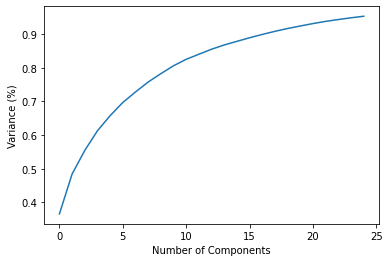

In [6]:
scaler = StandardScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

pca = PCA().fit(x_train_scaled)

# Calculate the cumulative explained variance
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

# Determine the number of components to keep for 85% variance explained
n_components = np.argmax(cumulative_variance_ratio >= 0.95) + 1

# Apply PCA with the selected number of components
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(x_train_scaled)
X_test_pca = pca.transform(x_test_scaled)

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)')
plt.show()

We can see that we can cut down some of the features, at around 300 components

In [7]:
print(X_train_pca.shape)
print(X_test_pca.shape)

(1288, 25)
(800, 25)


In [8]:

#x_train_scaled = x_train_scaled[:, :300]

grid_params = {
    'n_neighbors': [3, 5, 7, 9, 11, 15],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

model = GridSearchCV(KNeighborsClassifier(), grid_params, cv=5, n_jobs=-1)
model.fit(X_train_pca, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [3, 5, 7, 9, 11, 15],
                         'weights': ['uniform', 'distance']})

Model Score: 0.2425


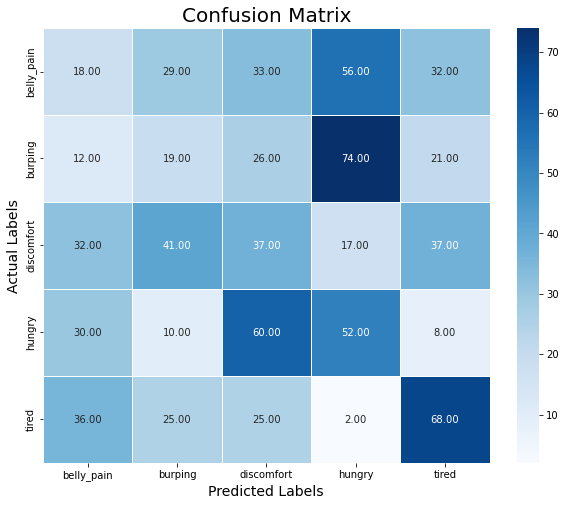

              precision    recall  f1-score   support

  belly_pain       0.14      0.11      0.12       168
     burping       0.15      0.12      0.14       152
  discomfort       0.20      0.23      0.21       164
      hungry       0.26      0.33      0.29       160
       tired       0.41      0.44      0.42       156

    accuracy                           0.24       800
   macro avg       0.23      0.24      0.24       800
weighted avg       0.23      0.24      0.24       800

Confusion Matrix: 
[[18 29 33 56 32]
 [12 19 26 74 21]
 [32 41 37 17 37]
 [30 10 60 52  8]
 [36 25 25  2 68]]


In [9]:
print(f'Model Score: {model.score(X_test_pca, y_test)}')

y_predict = model.predict(X_test_pca)

cm = confusion_matrix(y_test, y_predict)
plt.figure(figsize=(10, 8))
encoder = OneHotEncoder()
y_en = encoder.fit_transform(np.array(y_test).reshape(-1, 1)).toarray()

cm = pd.DataFrame(cm, index=[i for i in encoder.categories_], columns=[i for i in encoder.categories_])

sns.heatmap(cm, linecolor="white", cmap="Blues", linewidths=1, annot=True, fmt=".2f")

plt.title("Confusion Matrix", size=20)
plt.xlabel("Predicted Labels", size=14)
plt.ylabel("Actual Labels", size=14)
plt.show()
print(classification_report(y_test, y_predict))
print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_predict)}')